# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [79]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import csv 

# Import API key
from api_keys import weather_api_key
api_key = weather_api_key
url = 'http://api.openweathermap.org/data/2.5/weather?q='

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [80]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [81]:
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
maxtemp = []
wind_speed = [] 
city = []
i=0 
url_key = '&appid='+weather_api_key 

In [82]:
for i, city_list in enumerate(cities):
    try:
        weather_return = requests.get(url + city_list + '&units=imperial' + url_key).json()
                
        country.append(weather_return['sys']['country']) 
        lng.append(weather_return['coord']['lon']) 
        lat.append(weather_return['coord']['lat']) 
        maxtemp.append(weather_return['main']['temp_max']) 
        humidity.append(weather_return['main']['humidity']) 
        cloudiness.append(weather_return['clouds']['all']) 
        wind_speed.append(weather_return['wind']['speed'])
        date.append(weather_return['dt'])
        
        print(f"City request number {i+1}:{city_list}.")
        
        if city_list not in city:
            city.append(city_list)
            
    except: # data error
        print(f"City request number {i+1}:{city_list}. Data not found ")

City request number 1:punta arenas.
City request number 2:cape town.
City request number 3:ribeira grande.
City request number 4:longyearbyen.
City request number 5:dikson.
City request number 6:rikitea.
City request number 7:taolanaro. Data not found 
City request number 8:coahuayana.
City request number 9:hasaki.
City request number 10:port elizabeth.
City request number 11:hilo.
City request number 12:atuona.
City request number 13:winnemucca.
City request number 14:okakarara.
City request number 15:bichura.
City request number 16:ayolas.
City request number 17:sapa.
City request number 18:busselton.
City request number 19:saint-philippe.
City request number 20:albany.
City request number 21:nikolskoye.
City request number 22:jamestown.
City request number 23:sao filipe.
City request number 24:bambous virieux.
City request number 25:vaini.
City request number 26:lumeje.
City request number 27:mitu.
City request number 28:sentyabrskiy. Data not found 
City request number 29:illoqqort

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [90]:
weather_data = {
    "City": city,
    "Country":country,
    "Latitude": lat,
    "Longitude": lng,
    "Max Temp":maxtemp,
    "Humidity":humidity,
    "Cloudiness":cloudiness,
    "Wind Speed":wind_speed,
    "Date":date}

weather_data_df = pd.DataFrame(weather_data) 
weather_data_df.head()

,City,Country,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,punta arenas,CL,-53.15,-70.92,33.80,85,28,32.21,1597199569
1,cape town,ZA,-33.93,18.42,55.00,93,67,10.29,1597199482
2,ribeira grande,PT,38.52,-28.70,70.18,71,0,10.09,1597199569
3,longyearbyen,SJ,78.22,15.64,46.20,75,14,3.42,1597199569
4,dikson,RU,73.51,80.55,42.64,69,100,24.09,1597199570


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [91]:
high_humidity = weather_data_df[weather_data_df['Humidity']<=100]
high_humidity.reset_index(inplace=True)
high_humidity.drop(axis=1,labels="index", inplace=True)

high_humidity.head()

,City,Country,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,punta arenas,CL,-53.15,-70.92,33.80,85,28,32.21,1597199569
1,cape town,ZA,-33.93,18.42,55.00,93,67,10.29,1597199482
2,ribeira grande,PT,38.52,-28.70,70.18,71,0,10.09,1597199569
3,longyearbyen,SJ,78.22,15.64,46.20,75,14,3.42,1597199569
4,dikson,RU,73.51,80.55,42.64,69,100,24.09,1597199570


In [92]:
weather_data_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,5.630000e+02
mean,20.633801,17.214316,67.902558,70.134991,48.349911,7.485861,1.597200e+09
std,33.691518,90.847829,13.512353,20.571537,40.447674,5.239579,1.045649e+02
min,-54.800000,-179.170000,33.480000,1.000000,0.000000,0.400000,1.597199e+09
25%,-8.505000,-65.255000,57.200000,58.000000,1.000000,3.610000,1.597200e+09
50%,25.480000,20.800000,69.580000,74.000000,44.000000,6.220000,1.597200e+09
75%,50.010000,96.785000,78.800000,86.000000,90.000000,9.765000,1.597200e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,33.960000,1.597200e+09


In [93]:
# Export the City_Data into a csv
weather_data_df.to_csv("../output_data/cities.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [95]:
latitude = weather_data_df["Latitude"]
maxtemp = weather_data_df["Max Temp"]
date = input("Date Of Analysis")   

Date Of Analysis 08/01/2020


## Latitude vs. Temperature Plot

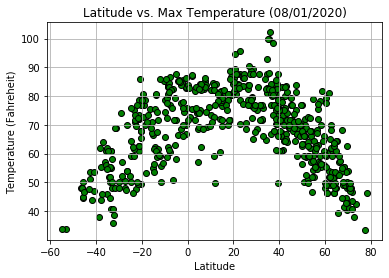

In [96]:
plt.scatter(latitude,maxtemp, marker="o", facecolors="green", edgecolors="black")
plt.title(f"Latitude vs. Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Temperature (Fahreheit)")
plt.grid()

plt.show()

## Latitude vs. Humidity Plot

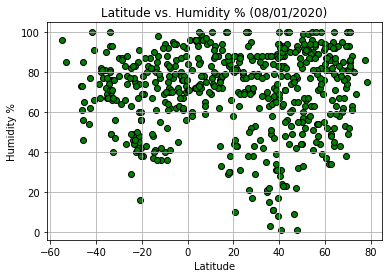

In [97]:
latitude = weather_data_df["Latitude"]
maxtemp = weather_data_df["Humidity"]
plt.scatter(latitude,maxtemp, marker="o", facecolors="green", edgecolors="black")
plt.title(f"Latitude vs. Humidity % ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid()

plt.show()

## Latitude vs. Cloudiness Plot

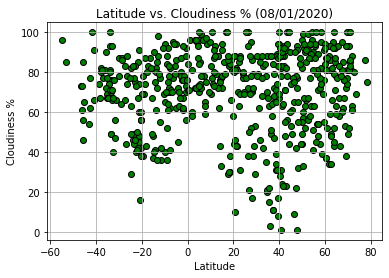

In [98]:
latitude = weather_data_df["Latitude"]
max_temp = weather_data_df["Cloudiness"]
plt.scatter(latitude,maxtemp, marker="o", facecolors="green", edgecolors="black")
plt.title(f"Latitude vs. Cloudiness % ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid()

plt.show()

## Latitude vs. Wind Speed Plot

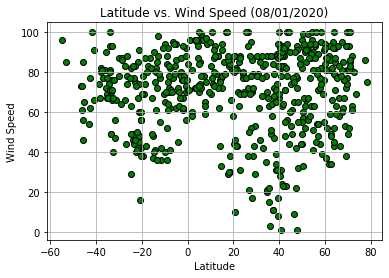

In [99]:
latitude = weather_data_df["Latitude"]
max_temp = weather_data_df["Wind Speed"]
plt.scatter(latitude,maxtemp, marker="o", facecolors="green", edgecolors="black")
plt.title(f"Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()

plt.show()

In [100]:
country = weather_data_df['Country']  
city = weather_data_df['City']
lat = weather_data_df['Latitude']           
lng = weather_data_df['Longitude']           
maxtemp = weather_data_df["Max Temp"]      
humidity = weather_data_df['Humidity']      
cloudiness = weather_data_df['Cloudiness']    
windspeed = weather_data_df['Wind Speed'] 

## Linear Regression

In [101]:
# OPTIONAL: Create a function to create Linear Regression plots

In [102]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_data_df[weather_data_df["Latitude"] >= 0]
southern_df = weather_data_df[weather_data_df["Latitude"] <= 0]

In [103]:
#Northern data
north_city=northern_df['City']
north_lat=northern_df['Latitude']           
north_lng=northern_df['Longitude']           
north_maxtemp=northern_df["Max Temp"]      
north_humidity=northern_df['Humidity']      
north_cloudiness=northern_df['Cloudiness']    
north_windspeed=northern_df['Wind Speed']    
north_country=northern_df['Country']

#Southern data
south_city=northern_df['City']
south_lat=northern_df['Latitude']           
south_lng=northern_df['Longitude']           
south_maxtemp=northern_df["Max Temp"]      
south_humidity=northern_df['Humidity']      
south_cloudiness=northern_df['Cloudiness']    
south_windspeed=northern_df['Wind Speed']    
south_country=northern_df['Country']

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

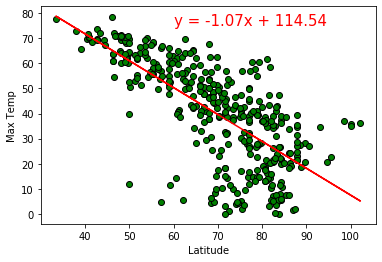

In [112]:
x_values = northern_df['Max Temp']
y_values = northern_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, marker="o", facecolors="green", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,75),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

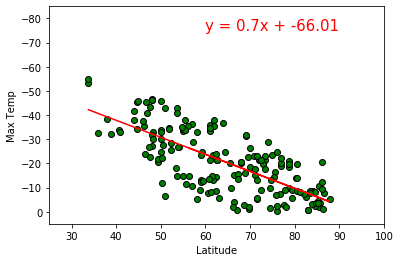

In [113]:
x_values = southern_df['Max Temp']
y_values = southern_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values,marker="o", facecolors="green", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,-75),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.xlim(25,100)
plt.ylim(5, -85)
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

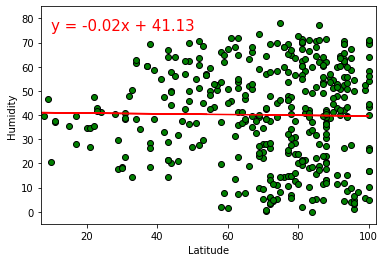

In [114]:
x_values = northern_df['Humidity']
y_values = northern_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values,marker="o", facecolors="green", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,75),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.xlim(7,102)
plt.ylim(-5, 85)

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

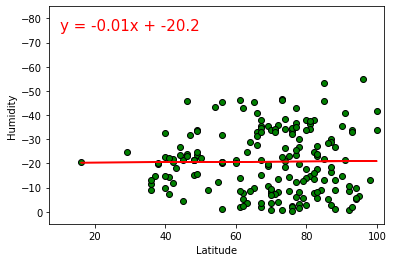

In [115]:
x_values = southern_df['Humidity']
y_values = southern_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values,marker="o", facecolors="green", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,-75),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.xlim(7,102)
plt.ylim(5, -85)

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

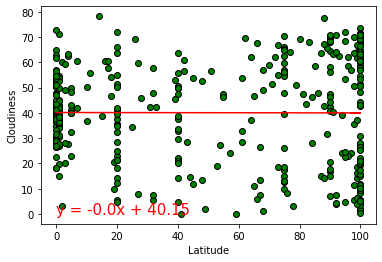

In [116]:
x_values = northern_df['Cloudiness']
y_values = northern_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values,marker="o", facecolors="green", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy=(x_values.min(),y_values.min()),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

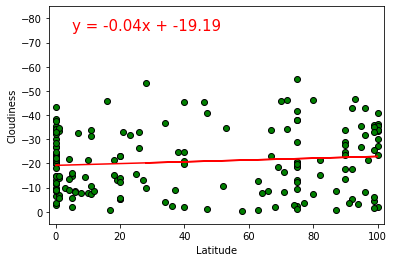

In [117]:
x_values = southern_df['Cloudiness']
y_values = southern_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values,marker="o", facecolors="green", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,-75),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.xlim(-2,102)
plt.ylim(5, -85)
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

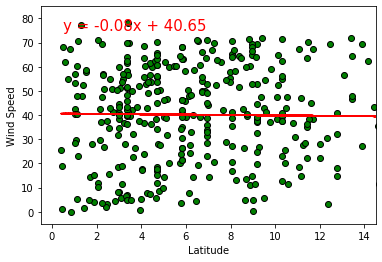

In [118]:
x_values = northern_df['Wind Speed']
y_values = northern_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values,marker="o", facecolors="green", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(.5,75),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.xlim(-0.5,14.5)
plt.ylim(-5, 85)
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

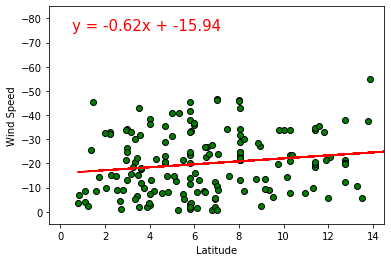

In [119]:
x_values = southern_df['Wind Speed']
y_values = southern_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values,marker="o", facecolors="green", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(.5,-75),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.xlim(-0.5,14.5)
plt.ylim(5, -85)

plt.show()